# EDA for Home Credit Default Risk Predictor

This notebook acts as Expolratory Data Analysis (EDA) for predicting Home Credit Default Risk Predictor Kaggle oroblem. This EDA notbook acts as a prior for "Home Credit Default Risk Predictor" notbook where these EDA findings are put in action.

Prerequisite: Please download data files from below url to "input.nosync" folder created at same level as this notebook. You can change the folder name by modifying value of variable "input_dir" under "Global_configurations" section

https://www.kaggle.com/c/home-credit-default-risk/data

### Imports

In [1]:
# all the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import pprint
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Global configurations

In [2]:
warnings.filterwarnings('ignore') # No warnings displayed
pp = pprint.PrettyPrinter(indent=4) # tab is set to 4 spaces while printing
input_dir = 'input.nosync' # Sub directory where data files are stored

### Check data files

First lets ensure we have required files saved on our machine. If data files not found then we halt the notebook execution.

In [3]:
# List input files, if not available please see prerequisite section at top of this notebook
input_files = os.listdir(input_dir)
if input_files is None or len(input_files) < 10 :
    raise Exception('You do not have all the files in {} directory'.format(input_dir))

print('You have all the input files. We can proceed further.')
print('Here are the data files\n')
pp.pprint(input_files)

You have all the input files. We can proceed further.
Here are the data files

[   'application_test.csv',
    '.DS_Store',
    'HomeCredit_columns_description.csv',
    'POS_CASH_balance.csv',
    'credit_card_balance.csv',
    'installments_payments.csv',
    'application_train.csv',
    'bureau.csv',
    'previous_application.csv',
    'bureau_balance.csv',
    'sample_submission.csv']


### Read data files

Here, we read our primary dataset "application_train.csv". As noted above and shown below, the dataset is of moderate size with 307,511 samples. The data is relatively wide with 122 features presented. Notably, we use the pandas library to handle reading our csv, as the data contains a mixute of numerical and categorical data. Using the pd.head() function we provide a view into the data, which demonstrate these features.

In [4]:
# Read application_train.csv
app_train = pd.read_csv(input_dir+'/application_train.csv')
print('Training data shape (Before Split): ', app_train.shape)
print('Top 5 rows from file are:')
app_train.head()

Training data shape (Before Split):  (307511, 122)
Top 5 rows from file are:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Training Data into Training and Testing Data

Since we do not have test data with labels, we have to split training data into train + test data before doing any EDA
Below we allocate a training and testing split and set the random state to ensure repeatability. To accomplish this, we use the sklearn's train_test_split function. We reserve 20% of the data for testing, which results in training and test sets of the size printed. 

In [5]:
# Move Target column to seperate variable
app_train_labels = app_train['TARGET']
#app_train = app_train.drop('TARGET', axis=1)

# split the training dataset into training (80%) and testing (20%)
split_ratio = 0.20
app_train_data, app_test_data, train_labels, test_labels = train_test_split(
    app_train, app_train_labels, test_size = split_ratio, random_state = 23 )

# copy ID column to separate variable so that it can be easily used 
# to join multiple DataFrames
app_train_data_skid_curr = app_train_data['SK_ID_CURR']
app_test_data_skid_curr = app_test_data['SK_ID_CURR']

In [6]:
print('Training data shape: ', app_train_data.shape)
print('Training label shape: ', train_labels.shape)
print('Test data shape: ', app_test_data.shape)
print('Test label shape: ', test_labels.shape)

print('Training SK ID data shape: ', app_train_data_skid_curr.shape)
print('Test SK ID data shape: ', app_test_data_skid_curr.shape)

Training data shape:  (246008, 122)
Training label shape:  (246008,)
Test data shape:  (61503, 122)
Test label shape:  (61503,)
Training SK ID data shape:  (246008,)
Test SK ID data shape:  (61503,)


## EDA on Current Application Data (APP_TRAIN_DATA)

Now let's go through columns in app_train_data and note down any anomaly or pattern that we can find out and use for default prediction

### Count of Children

In [7]:
#1. CNT_CHILDREN
app_train_data['CNT_CHILDREN'].describe()

count    246008.000000
mean          0.416238
std           0.720993
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [8]:
app_train_data['CNT_CHILDREN'].value_counts()

0     172441
1      48771
2      21392
3       2974
4        328
5         69
6         16
7          7
14         2
12         2
10         2
19         1
11         1
9          1
8          1
Name: CNT_CHILDREN, dtype: int64

Maximum CNT_CHILDREN is 19, which looks bit suspicious. So we look at how many people have such high count and find that there are handful of people having more than 6 children. So this looks to be genuine tail and will not affect our models. So we can ignore such high counts.

### Applicant's Age

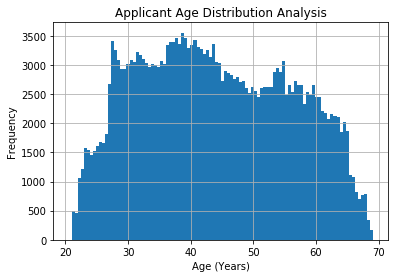

In [9]:
#2. DAYS_BIRTH 
# DAYS_BIRTH is in the form of days from date of loan application, so it is in -ve
# so lets divide by -365 to see distribution in years unit
(app_train_data['DAYS_BIRTH']/-365).hist(bins=100)
plt.title('Applicant Age Distribution Analysis')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

The distribution looks ok. No issues here

### Employment Duration

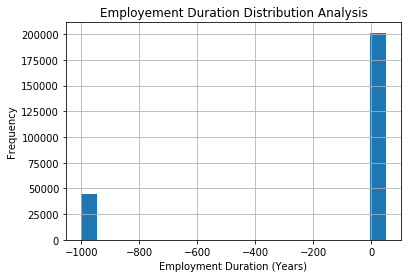

In [10]:
(app_train_data['DAYS_EMPLOYED']/-365).hist(bins=20)
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Frequency')
plt.title('Employement Duration Distribution Analysis')
plt.show()

This looks abnormal, there are around 40k records with -1000 years of Somployement Duration. May be some form of -ve number is used to represent absenct value.

In [11]:
# Lets find how many records have this -ve value
print('Number of records with -ve Employment Duration='
      ,sum((app_train_data['DAYS_EMPLOYED']/-365)<0))

Number of records with -ve Employment Duration= 44521


This needs to be addressed during Data Cleanup activity.
But lets look deeper into this whether these -ve values mean anything to our Target. Lets find correlation of these records with Target

In [12]:
# Find correlation of -ve Employment duration vs entire population correlation
app_train_data_de = pd.DataFrame(app_train_data, columns=['DAYS_EMPLOYED','TARGET'])
app_train_data_de['ANOMALY_DAYS_EMPLOYED']=app_train_data_de['DAYS_EMPLOYED']==365243
app_train_data_de.corr()[['TARGET']]

,TARGET
DAYS_EMPLOYED,-0.044661
TARGET,1.000000
ANOMALY_DAYS_EMPLOYED,-0.045719


Correlation with Target for Anomaly Employment Duration is almost same (-0.045) as overall correlation (-0.044). So it does appear that this anamoly will affect overall default prediction.

### Publish Duration

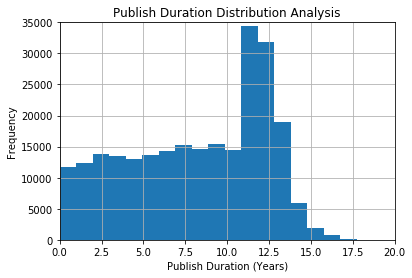

In [13]:
(app_train_data['DAYS_ID_PUBLISH']/-365).hist(bins=20)
plt.xlabel('Publish Duration (Years)')
plt.ylabel('Frequency')
plt.title('Publish Duration Distribution Analysis')
plt.axis([0,20,0,35000])
plt.grid(True)
plt.show()

There is a spike brtween 11 to 14 years. Lets see if this spike shows any deviation in correlation woth Target

In [14]:
# Create DataFrame for analysis with just two features 'DAYS_ID_PUBLISH','TARGET'
app_train_data_dip = pd.DataFrame(app_train_data, columns=['DAYS_ID_PUBLISH','TARGET'])
# convert to Years for easier interpretation
app_train_data_dip['YEARS_ID_PUBLISH'] = app_train_data_dip['DAYS_ID_PUBLISH']/-365
# Create indicator column for spike
app_train_data_dip['SPIKE_DAYS_ID_PUBLISH']=app_train_data_dip['YEARS_ID_PUBLISH'].between(
    10, 15, inclusive=False)
app_train_data_dip.corr()[['TARGET']]

,TARGET
DAYS_ID_PUBLISH,0.050282
TARGET,1.000000
YEARS_ID_PUBLISH,-0.050282
SPIKE_DAYS_ID_PUBLISH,-0.041389


The correlation of SPIKE_DAYS_ID_PUBLISH is -0.04 which is almost 1% different than overall feature correlation of +.05. So we this spike may not affect our regresison models. But lets take a final look at the ditribution of DAYS_ID_PUBLISH for different values of target

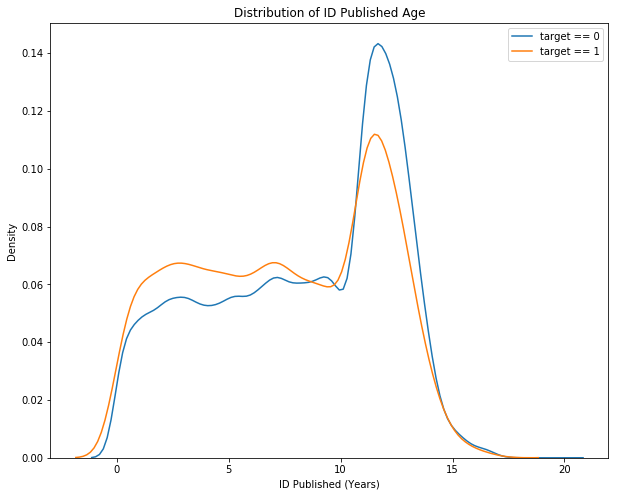

In [15]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train_data_dip.loc[app_train_data_dip['TARGET'] == 0, 'YEARS_ID_PUBLISH'] 
            , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train_data_dip.loc[app_train_data_dip['TARGET'] == 1, 'YEARS_ID_PUBLISH'] 
            , label = 'target == 1')

# Labeling of plot
plt.xlabel('ID Published (Years)'); plt.ylabel('Density'); 
plt.title('Distribution of ID Published Age');
# The mountain between 11 to 14 years may mean something. 
# need more business knowledge to make use of this finding

There is not real inference from the spike or the overall distribution. Both values of Target show similar patterns. We need more business domain knowledge to understand this spike.

### Weekday on which application was processed

Lets see if application processed on certain days show any relation with Target.

In [16]:
# WEEKDAY_APPR_PROCESS_START => Nothing suspicious

# Create separate DataFrame of required columns
app_train_data_weekday = pd.DataFrame(data=app_train_data
                                      , columns=['WEEKDAY_APPR_PROCESS_START','TARGET'])

# rename to readable column
app_train_data_weekday = app_train_data_weekday.rename(index=str
                            , columns=({'WEEKDAY_APPR_PROCESS_START': 'Weekday'}))

# Find aggregated stats per Weekday
app_train_data_weekday_grp=app_train_data_weekday.groupby(['Weekday']
                                                    ,as_index=False).agg(['sum','count'])

# Rename aggregated columns to meaning full names
app_train_data_weekday_grp=app_train_data_weekday_grp.rename(index=str
                , columns = {'sum':'DefaultCount','count':'TotalCount'})

# Calculate %Defaulted loans sanctioned per day
app_train_data_weekday_grp[('TARGET', '%Default')] = app_train_data_weekday_grp[
    ('TARGET', 'DefaultCount')] / app_train_data_weekday_grp[('TARGET', 'TotalCount')]

# Display the results
app_train_data_weekday_grp

TARGET                     
          DefaultCount TotalCount  %Default
Weekday                                    
FRIDAY            3273      40297  0.081222
MONDAY            3175      40796  0.077826
SATURDAY          2142      27013  0.079295
SUNDAY            1025      13003  0.078828
THURSDAY          3284      40372  0.081344
TUESDAY           3599      43057  0.083587
WEDNESDAY         3391      41470  0.081770

We see a dip in Total Count of loans over the weekend as expected but %Default remains around 8 consistently throughout the week. So nothing to worry about.

### Days Phone Last Changed

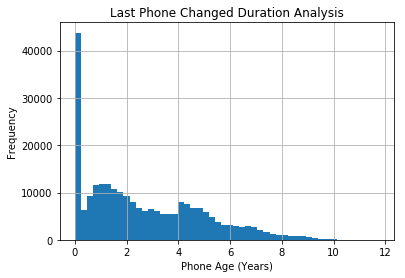

In [17]:
(app_train_data['DAYS_LAST_PHONE_CHANGE']/-365).hist(bins=50)
plt.title('Last Phone Changed Duration Analysis')
plt.xlabel('Phone Age (Years)')
plt.ylabel('Frequency')
plt.show()

There is huge spike around 0 indicating are more than 40k people out of 246k applicants. Thats alarming, lets probe this further.

In [18]:
# Create separate DataFrame for DAYS_LAST_PHONE_CHANGE analysis with required columns
app_train_data_dlpc=pd.DataFrame(data=app_train_data
                                 , columns=['DAYS_LAST_PHONE_CHANGE','TARGET'])

# Convert from -ve days since last phone changed to +ve years, this unit is more human readable
app_train_data_dlpc['YEARS_LAST_PHONE_CHANGE']=app_train_data_dlpc[
    'DAYS_LAST_PHONE_CHANGE'] /-365

# Create three indicator columns capturing different range near zero
app_train_data_dlpc['100_DAYS_LAST_PHONE_CHANGE']= (app_train_data[
    'DAYS_LAST_PHONE_CHANGE']*-1)<100
app_train_data_dlpc['1000_DAYS_LAST_PHONE_CHANGE']= (app_train_data[
    'DAYS_LAST_PHONE_CHANGE']*-1)<1000
app_train_data_dlpc['ZERO_DAYS_LAST_PHONE_CHANGE']= app_train_data_dlpc[
    'DAYS_LAST_PHONE_CHANGE']==0

# Also create one more new feature to capture first quantile of years
app_train_data_dlpc_stats=(app_train_data['DAYS_LAST_PHONE_CHANGE']*-1).describe()
app_train_data_dlpc['FIRST_QUANTILE_DAYS_LAST_PHONE_CHANGE']= app_train_data_dlpc[
    'DAYS_LAST_PHONE_CHANGE']<app_train_data_dlpc_stats['25%']

# now drop original -ve days feature as we already have years feature
app_train_data_dlpc.drop('DAYS_LAST_PHONE_CHANGE', inplace=True, axis=1)

# correlation with all these new feature columns
app_train_data_dlpc.corr()[['TARGET']].sort_values(by='TARGET')

,TARGET
YEARS_LAST_PHONE_CHANGE,-0.055531
FIRST_QUANTILE_DAYS_LAST_PHONE_CHANGE,0.000598
ZERO_DAYS_LAST_PHONE_CHANGE,0.021635
100_DAYS_LAST_PHONE_CHANGE,0.022145
1000_DAYS_LAST_PHONE_CHANGE,0.052746
TARGET,1.000000


We can clearly see if phone is changed 0 days before application then it has +ve .02 correlation, it keeps going up till 1000 days i.e. apprx 3 years where corelation becomes =.05 i.e. more chance of default
It is interesting to note that overall correlation of this feature is actually -.05 (YEARS_LAST_PHONE_CHANGE) which is quite opposite of short range data correlation.

This looks like important information and we will create these indicator features for our regression model.

### Missing Values

Now lets find out how many fields do we have with missing values and whether these missing values contribute to our Target variable

In [19]:
# Function to calculate missing values by column 
def get_missing_values_stats(data, label):
    '''
        Calculates missing values per column in given DataFrame. Also calculates statistics of
        % of default for total column vs missing values to understand impact of missing values 
        on Target
        
        Args:
            data: DataFrame on which missing value analysis needs to be carried out
            label: Target label for dataset passed in 'data' object.
                This label object is the one on which the impact of missing values 
                needs to be analysed
        Return:
            DataFrame, function retuns Panda DataFrame containing statistics for all the columns 
                which haave atleast one missing row along with the impact of missing rows 
                on target label
    '''


    # Total missing values per column
    missing_values = data.isnull().sum()

    # Percentage of missing values per column
    missing_values_percent = 100 * missing_values / len(data)

    # Percentage of missing values per column when Target = 0
    missing_values_percent_target_0 = 100 * data[label.values==0].isnull().sum() / len(
        data[label.values==0])

    # Percentage of missing values per column when Target = 1
    missing_values_percent_target_1 = 100 * data[label.values==1].isnull().sum() / len(
        data[label.values==1])       


    # results table
    status_table = pd.concat([missing_values, missing_values_percent
                              , missing_values_percent_target_0
                              , missing_values_percent_target_1
                             , abs(missing_values_percent_target_0-
                                   missing_values_percent_target_1)]
                             , axis=1)

    # Give Headers
    status_table = status_table.rename(
    columns = {0 : 'Missing Count', 1 : '%Total'
              ,2 : '%Target=0', 3 : '%Target=1'
              ,4 : '%Diff'})



    # Remove columns not having any missing values
    status_table = status_table[status_table['Missing Count'] != 0]
    status_table = status_table.drop('Missing Count', axis=1)


    # Sort the table by percentage of missing descending
    status_table = status_table.sort_values(
    '%Diff', ascending=False)

    print ("Data has {} columns out of which {} columns have missing values"
           .format(str(data.shape[1]),str(status_table.shape[0])))

    return status_table
  
# Get missing value stats on training dataset
train_missing_values = get_missing_values_stats(app_train_data, train_labels)

print('Number of columns with more than 3% difference in number of missing values when Target is 0 vs 1 = {}'
      .format(sum(train_missing_values['%Diff'] > 3)))

print('First 15 columns with highest %Diff are\n')
print(train_missing_values.head(15))

Data has 122 columns out of which 67 columns have missing values
Number of columns with more than 3% difference in number of missing values when Target is 0 vs 1 = 57
First 15 columns with highest %Diff are

                                 %Total  %Target=0  %Target=1     %Diff
FLOORSMAX_AVG                 49.760577  49.140055  56.815325  7.675270
FLOORSMAX_MODE                49.760577  49.140055  56.815325  7.675270
FLOORSMAX_MEDI                49.760577  49.140055  56.815325  7.675270
EMERGENCYSTATE_MODE           47.392361  46.772717  54.437126  7.664409
ENTRANCES_MODE                50.333729  49.714973  57.368395  7.653422
ENTRANCES_AVG                 50.333729  49.714973  57.368395  7.653422
ENTRANCES_MEDI                50.333729  49.714973  57.368395  7.653422
TOTALAREA_MODE                48.263065  47.644382  55.296898  7.652516
YEARS_BEGINEXPLUATATION_MODE  48.770365  48.159155  55.719242  7.560087
YEARS_BEGINEXPLUATATION_AVG   48.770365  48.159155  55.719242  7.560087


Out of 67 columns having missing values 57 columns have more than 3% difference between % of missing values for Target = 0 vs Target = 1.
Hence this looks like significant information. So while we impute the Nulls with 0 we need to capture that these values were Null in an indicator column before feeding this data to regresison models.

### External Source Ratings

We have External ratings for our customers from 3 sources. Lets analyse how they correlate with our Target.

In [20]:
# 3 External source ratings columns
ext_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']
app_train_data_ext = pd.DataFrame(data=app_train_data, columns=ext_columns)
print(app_train_data_ext.corr())

              EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_1      1.000000      0.212681      0.187024 -0.155819
EXT_SOURCE_2      0.212681      1.000000      0.108909 -0.161250
EXT_SOURCE_3      0.187024      0.108909      1.000000 -0.179743
TARGET           -0.155819     -0.161250     -0.179743  1.000000


All 3 ratings have mild -ve correlation with Target meaning better the rating less chance of default.
We also note that these ratings have mild correlation among themselves as well and it is logical to assume that ratings from different sources would be similar for a given customer in most cases.
So we lets try to find if we create higher order feature using these 3 source ratings do we see any better correlation with Traget.

In [21]:
# Lets recreate our DataFrame without Target as 
#we first want to find higher orders for just 3 source features
ext_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'] 
app_train_data_ext = pd.DataFrame(data=app_train_data, columns=ext_columns)

# Lets create 3rd order Polynomial creator. 
poly_transformer = PolynomialFeatures(degree = 3) 

# Fit & transform our training data. First we need to take care of NaN though
app_train_data_ext.fillna(0, inplace=True)
poly_transformer.fit(app_train_data_ext)
app_train_data_ext=poly_transformer.transform(app_train_data_ext)

In [22]:
# Lets see how many new features created
ploy_feature_names = poly_transformer.get_feature_names(input_features = ext_columns)
print('ploy_feature_names=')
pp.pprint(ploy_feature_names)
app_train_data_ext = pd.DataFrame(app_train_data_ext, 
                             columns = ploy_feature_names)

ploy_feature_names=
[   '1',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'EXT_SOURCE_1^2',
    'EXT_SOURCE_1 EXT_SOURCE_2',
    'EXT_SOURCE_1 EXT_SOURCE_3',
    'EXT_SOURCE_2^2',
    'EXT_SOURCE_2 EXT_SOURCE_3',
    'EXT_SOURCE_3^2',
    'EXT_SOURCE_1^3',
    'EXT_SOURCE_1^2 EXT_SOURCE_2',
    'EXT_SOURCE_1^2 EXT_SOURCE_3',
    'EXT_SOURCE_1 EXT_SOURCE_2^2',
    'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
    'EXT_SOURCE_1 EXT_SOURCE_3^2',
    'EXT_SOURCE_2^3',
    'EXT_SOURCE_2^2 EXT_SOURCE_3',
    'EXT_SOURCE_2 EXT_SOURCE_3^2',
    'EXT_SOURCE_3^3']


In [23]:
# Add Target variable back so that we can do correlation analysis
app_train_data_ext=app_train_data_ext.assign(TARGET=train_labels.values)
app_train_data_ext_poly_corr=app_train_data_ext.corr()

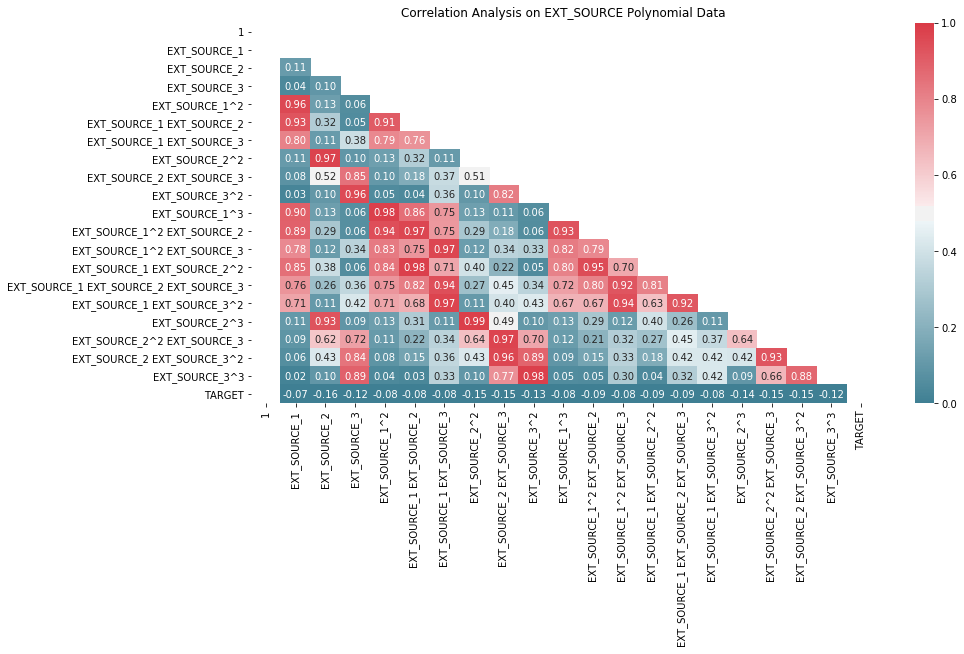

In [24]:
# Lets plot the correlations
mask = np.zeros_like(app_train_data_ext_poly_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(14,7))
sns.heatmap(app_train_data_ext_poly_corr, cmap = cmap, vmin=0, vmax=1, annot=True
            , mask=mask, fmt=".2f")
plt.title('Correlation Analysis on EXT_SOURCE Polynomial Data')
plt.show()

If we look at the last row corresponding to Target, we do see that there are many weak correlations with hiegher order terms, though not as strong as EXT_SOURCE_2. So we can try adding these new features to our model and see if they improve the accuracy.

### EDA on supplimentory data

Apart from main application data, we have other supplimentory files about hostory of the applicant of the loan.
Now we will look at these other details and try to see if we can make some useful discoveries

#### Past Credit Accounts Data from Bureau

Lets ready Past Credit Accounts Data from Bureau from bureau.csv

In [25]:
# Read bureau.csv = > Past Credit Accounts data
bureau_data = pd.read_csv(input_dir+'/bureau.csv')
print('Bureau data shape : ', bureau_data.shape)
bureau_data.head()

Bureau data shape :  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Since for a given customer there are multiple records in Bureau each indicating one previous loan account, we first need to aggregate these numbers per current loan applicant.

In [26]:
# columns we want to aggregate per customer
agg_columns = ['CNT_CREDIT_PROLONG','AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT'
               , 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']
bureau_data_sk_id = bureau_data.groupby(['SK_ID_CURR'],as_index=False)[agg_columns].sum()

In [27]:
# Lets look at some general information from aggregated numbers
print('Number of unique current customers in bureau data',len(bureau_data_sk_id))
print('Number of unique current customer in bureau data with overdue amount',
      len(bureau_data_sk_id[bureau_data_sk_id['AMT_CREDIT_SUM_OVERDUE']>0]))

# Lets look at other columns for sample data with some overdue amount to feel the data
bureau_data_sk_id[bureau_data_sk_id['AMT_CREDIT_SUM_OVERDUE']>0].head(5)

Number of unique current customers in bureau data 305811
Number of unique current customer in bureau data with overdue amount 3801


,SK_ID_CURR,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
103,100120,0,368910.00,108837.000,0.0,166.50
139,100162,0,3101292.72,1486351.845,0.0,13.50
298,100341,0,731285.46,204894.000,0.0,459.00
306,100349,0,3069684.00,692905.500,0.0,19359.00
405,100472,0,900000.00,874039.500,0.0,18920.25


Now that we have aggregated bureau data per customer, we can join it with our primary application training data to find correlation with Target

In [28]:
# Create smaller DataFrame with key columns
bureau_data_sk_id_target = pd.DataFrame(data=app_train_data, columns=[
    'SK_ID_CURR','TARGET','AMT_INCOME_TOTAL'])

# Join Training data columns with bureau data on SK_ID_CURR
bureau_data_sk_id_target = bureau_data_sk_id_target.merge(bureau_data_sk_id
                                                    , on = 'SK_ID_CURR', how = 'left')

# Calculate income to past debt ratio
bureau_data_sk_id_target['AMT_DEBT_TO_INCOME_RATIO'] = bureau_data_sk_id_target[
    'AMT_CREDIT_SUM_DEBT']/bureau_data_sk_id_target['AMT_INCOME_TOTAL']

# Lets feel the data
bureau_data_sk_id_target.head(5)

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DEBT_TO_INCOME_RATIO
0,195470,0,157500.0,0.0,148500.000,0.0,0.0,0.0,0.000000
1,216988,0,270000.0,0.0,2933631.000,1095282.0,0.0,0.0,4.056600
2,200986,1,67500.0,NaN,NaN,NaN,NaN,NaN,NaN
3,369975,0,157500.0,0.0,1599568.740,1442335.5,0.0,0.0,9.157686
4,349936,0,180000.0,0.0,971102.745,0.0,0.0,0.0,0.000000


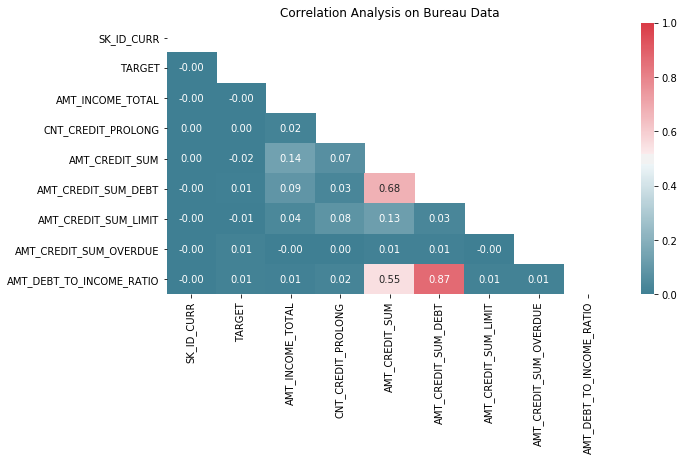

In [29]:
# Lets calculate correlation of bureau data with Target
corr = bureau_data_sk_id_target.corr()
#print(corr['TARGET'])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap = cmap, vmin=0, vmax=1, annot=True, mask=mask, fmt=".2f")
plt.title('Correlation Analysis on Bureau Data')
plt.show()

As expected AMT_CREDIT_SUM (Amount of Credit in Bureau) and  AMT_CREDIT_SUM_MILIT (Credit Limit) has weak -ve correlation indicating more approved credit and credit limit for a customer means that customer is less likely to default.
At the same time we see mild +ve correlation withe overdue amount and debt to income ration which we calculated by joining data from two different files.
We can use this iformation in our models and see if it improves the performance

#### Past POS monthly credit history

Let's try to find some interesting bits from customer past montly POS payments credit history

In [30]:
# Read POS_CASH_balance.csv = > Past POS credit history
pos_cash_balance_data = pd.read_csv(input_dir+'/POS_CASH_balance.csv')
print('pos_cash_balance_data shape : ', pos_cash_balance_data.shape)
pos_cash_balance_data.head()

pos_cash_balance_data shape :  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Since the data has multiple rows per customer, first we need to aggregate it per customer. Note that this data has repeated rowsn each indicating a snapshot of customer for a given month i.e. it captures month on month variations in same indicators for a given customer.
So we can not simply sum them up, that will create factorial data. So we take mean of the indicators to understand on an average how this customer behaved in past. Ofcourse we can to much deeper trend analysis on this data if time and computation permits.

In [31]:
# Columns that we are inetersted in
agg_columns = ['MONTHS_BALANCE','CNT_INSTALMENT_FUTURE','SK_DPD_DEF', 'SK_DPD']

# Aggregate using mean 
pos_cash_balance_data_sk_id = pos_cash_balance_data.groupby(['SK_ID_CURR']
                                                            ,as_index=False)[
    agg_columns].mean()

# Feel the data
pos_cash_balance_data_sk_id.head(5)

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,SK_DPD_DEF,SK_DPD
0,100001,-72.555556,1.444444,0.777778,0.777778
1,100002,-10.000000,15.000000,0.000000,0.000000
2,100003,-43.785714,5.785714,0.000000,0.000000
3,100004,-25.500000,2.250000,0.000000,0.000000
4,100005,-20.000000,7.200000,0.000000,0.000000


In [32]:
# Merge POS data with main training data
pos_cash_balance_data_sk_id_target = pd.DataFrame(data = app_train_data
                                            , columns=['SK_ID_CURR', 'TARGET'])
pos_cash_balance_data_sk_id_target = pos_cash_balance_data_sk_id_target.merge(
    pos_cash_balance_data_sk_id, on = 'SK_ID_CURR', how = 'left')
pos_cash_balance_data_sk_id_target.head(5)

,SK_ID_CURR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,SK_DPD_DEF,SK_DPD
0,195470,0,-37.252427,15.990291,0.000000,0.000000
1,216988,0,-43.596154,8.692308,0.000000,0.000000
2,200986,1,-15.846154,38.211538,0.865385,0.865385
3,369975,0,-11.533333,5.600000,0.000000,0.000000
4,349936,0,-29.431373,13.274510,0.000000,0.000000


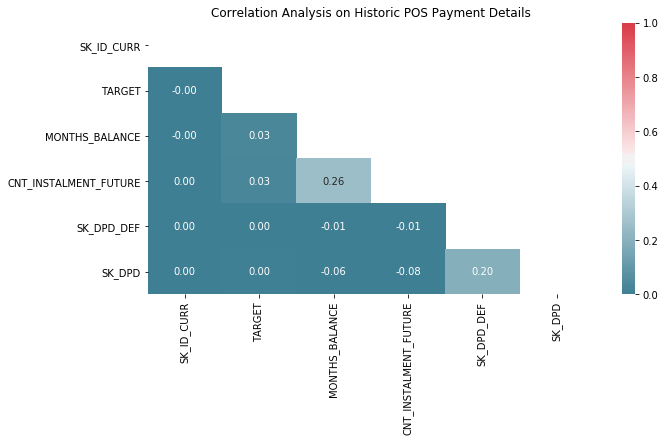

In [33]:
# Lets plot the correlation matrix
corr = pos_cash_balance_data_sk_id_target.corr()
#print(corr['TARGET'])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap = cmap, vmin=0, vmax=1, annot=True, mask=mask, fmt=".2f")
plt.title('Correlation Analysis on Historic POS Payment Details')
plt.show()

We see a mild +ve correlation from two fatures 
1. MONTH_BALANCE indicating more average monthly painding balance means more chance of failure
2. CNT_INSTALMENT_FUTURE  indicating more future installments remaining more chance of default

Even though these are mild correlations, we will add them to our model and see if it improves the result


#### Past Credit Card payment history

Let's try to find some interesting bits from customer's past credit card payment hostory

In [34]:
# Read credit_card_balance.csv = > Past  credit card history
credit_card_balance_data = pd.read_csv(input_dir+'/credit_card_balance.csv')
print('credit_card_balance_data shape : ', credit_card_balance_data.shape)
credit_card_balance_data.head()

credit_card_balance_data shape :  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Since the data has multiple rows per customer, first we need to aggregate it per customer. Note that this data has repeated rowsn each indicating a snapshot of customer for a given month i.e. it captures month on month variations in same indicators for a given customer.
So we can not simply sum them up, that will create factorial data. So we take mean of the indicators to understand on an average how this customer behaved in past. Ofcourse we can to much deeper trend analysis on this data if time and computation permits.

In [35]:
# convert -ve MONTHS_BALANCE to +ve so correlations are easily interpretable
credit_card_balance_data['MONTHS_BALANCE']=-credit_card_balance_data['MONTHS_BALANCE']

# Create new feature indicating number of paid installments per month on previous credit
credit_card_balance_data['CNT_INSTALMENT_MATURE_CUM_NORMALIZE'] = credit_card_balance_data[
    'CNT_INSTALMENT_MATURE_CUM']/credit_card_balance_data['MONTHS_BALANCE']

# print columns we are interested in for further analysis
interesting_columns =['MONTHS_BALANCE','AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECIVABLE'
                      , 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_TOTAL_RECEIVABLE'
                      , 'CNT_INSTALMENT_MATURE_CUM'
                      , 'SK_DPD','SK_DPD_DEF','CNT_INSTALMENT_MATURE_CUM_NORMALIZE']
credit_card_balance_data[interesting_columns].head(5)

,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_MATURE_CUM_NORMALIZE
0,6,56.970,1800.0,0.000,0.000,0.000,35.0,0,0,5.833333
1,1,63975.555,2250.0,64875.555,60175.080,64875.555,69.0,0,0,69.000000
2,7,31815.225,2250.0,31460.085,26926.425,31460.085,30.0,0,0,4.285714
3,4,236572.110,11925.0,233048.970,224949.285,233048.970,10.0,0,0,2.500000
4,1,453919.455,27000.0,453919.455,443044.395,453919.455,101.0,0,0,101.000000


In [36]:
# Aggregare the columns we are interested in by Customer id SK_ID_CURR
agg_columns = interesting_columns
credit_card_balance_data_sk_id = credit_card_balance_data.groupby(['SK_ID_CURR']
                                    ,as_index=False)[agg_columns].mean()
credit_card_balance_data_sk_id.head(5)

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_MATURE_CUM_NORMALIZE
0,100006,3.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100011,38.5,54482.111149,4520.067568,54433.179122,52402.088919,54433.179122,25.767123,0.000000,0.000000,1.642171
2,100013,48.5,18159.919219,6817.172344,18101.079844,17255.559844,18101.079844,18.719101,0.010417,0.010417,1.212239
3,100021,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100023,7.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
# Merge credit card payments data with main customer application data on SK_ID_CURR
credit_card_balance_data_sk_id_target = pd.DataFrame(data=app_train_data
                                                     , columns=['SK_ID_CURR','TARGET'])
credit_card_balance_data_sk_id_target = credit_card_balance_data_sk_id_target.merge(
    credit_card_balance_data_sk_id, on = 'SK_ID_CURR', how = 'left')

# create new feature for ration of amount paid to average receivable for a customer
credit_card_balance_data_sk_id_target['AMT_PAYMENT_TO_RECEIVABLE_RATIO'
        ] = credit_card_balance_data_sk_id_target['AMT_PAYMENT_TOTAL_CURRENT'
        ] /credit_card_balance_data_sk_id_target['AMT_TOTAL_RECEIVABLE']

# feel the data
credit_card_balance_data_sk_id_target.head(5)

,SK_ID_CURR,TARGET,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_MATURE_CUM_NORMALIZE,AMT_PAYMENT_TO_RECEIVABLE_RATIO
0,195470,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,216988,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200986,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,369975,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,349936,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


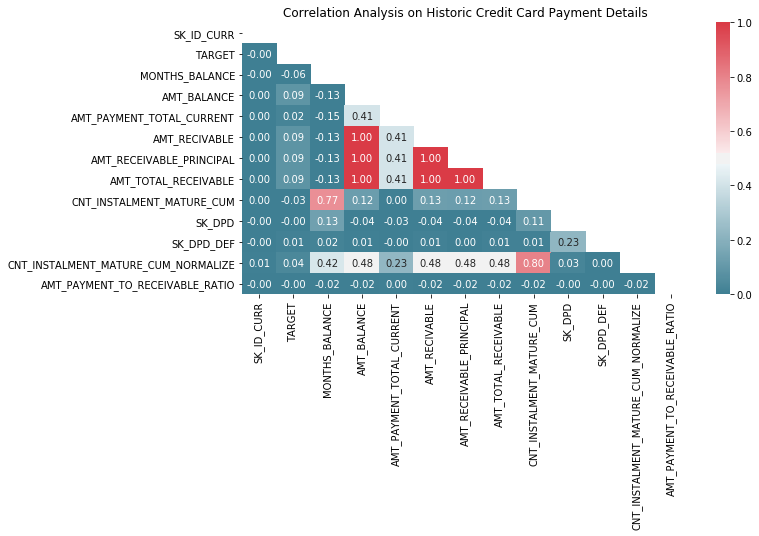

In [38]:
# Calculate correlation between various credit card payment features with Target
corr = credit_card_balance_data_sk_id_target.corr()
#print(corr['TARGET'].sort_values())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap = cmap, vmin=0, vmax=1, annot=True, mask=mask, fmt=".2f")
plt.title('Correlation Analysis on Historic Credit Card Payment Details')
plt.show()

There are bunch of amounts receivable fields showinf +.09 correlation indicating more amount was due from customer in past higher chances that customer will default in future.
Also our calculated feature normalized installment count is showing +.04 correlation which probably means if customer has served more installments in past per month then that customer probably had many ongoing loans and may default sooner than others on new loan.
We should alsi note that MONTHS_BALANCE is showing -.06 correlation whic can be described as more customer monthly payment hostory we have, ess chance of default.

We will use all these new findings from EDA into our main mdoels